In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
from PIL import Image
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [5]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


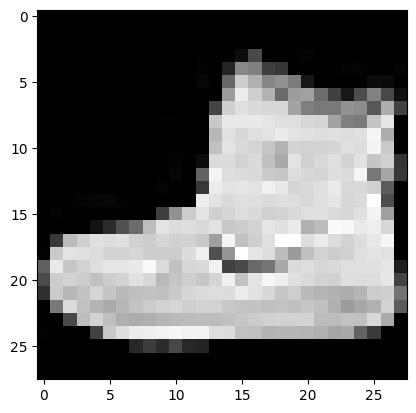

In [6]:
plt.imshow(train_images[0], cmap='gray')

In [7]:
# Convert images to one-dimensional arrays
num_train_samples = train_images.shape[0]
num_test_samples = test_images.shape[0]
num_features = train_images.shape[1] * train_images.shape[2]

train_images_reshaped = train_images.reshape((num_train_samples, num_features))
test_images_reshaped = test_images.reshape((num_test_samples, num_features))

# Create DataFrames for training and testing data
df_train = pd.DataFrame(train_images_reshaped)
df_test = pd.DataFrame(test_images_reshaped)

# Add a column for labels at the end
df_train['label'] = train_labels
df_test['label'] = test_labels

In [8]:
print(df_train.shape)
print(df_test.shape)

(60000, 785)
(10000, 785)


In [9]:
df_train[df_train["label"]==0]

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
1,0,0,0,0,0,1,0,0,0,0,...,114,130,76,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,11,142,200,...,110,158,18,0,3,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,...,80,46,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59943,0,0,0,0,0,1,0,1,0,0,...,128,99,100,0,0,1,0,0,0,0
59965,0,0,0,1,1,0,0,116,29,0,...,181,161,182,108,0,0,0,0,0,0
59974,0,0,0,0,0,1,0,0,0,42,...,1,0,0,13,2,0,1,0,0,0
59985,0,0,2,0,2,0,0,0,0,0,...,174,98,0,0,0,1,0,0,0,0


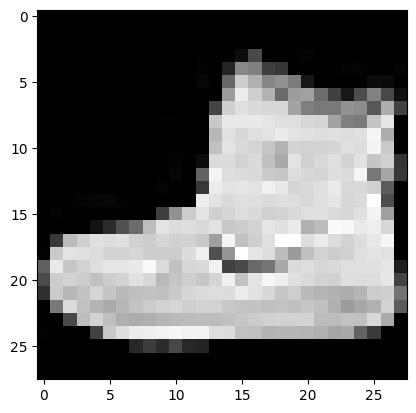

In [10]:
item = df_train.drop('label', axis=1).iloc[0].values.reshape(28,28)
plt.imshow(item, cmap='gray')

In [ ]:
# Generate dataset with only samples from a single label

df_train_all = pd.DataFrame()
df_test_all = pd.DataFrame()

for i in range(0,10):
    df_train_aux = df_train[df_train["label"]==i]   
    df_test_aux = df_test[df_test["label"]==i] 
    print(f"{i}: {df_train_aux.shape}, {df_test_aux.shape}") 
    
    df_train_all = pd.concat([df_train_all, df_train_aux])
    df_test_all = pd.concat([df_test_all, df_test_aux]) 
    
    df_train_aux.reset_index(drop=True, inplace=True)
    df_test_aux.reset_index(drop=True, inplace=True)
      
    df_train_aux.to_pickle(f"/home/renan/Documentos/tmp/Datasets/fmnist/non-iid/{i+1}_train.pickle")
    df_test_aux.to_pickle(f"/home/renan/Documentos/tmp/Datasets/fmnist/non-iid/{i+1}_test.pickle")

df_train_all.reset_index(drop=True, inplace=True)
df_test_all.reset_index(drop=True, inplace=True)
df_train_all.to_pickle(f"/home/renan/Documentos/tmp/Datasets/fmnist/fmnist/train.pickle")
df_test_all.to_pickle(f"/home/renan/Documentos/tmp/Datasets/fmnist/fmnist/test.pickle")


In [ ]:
train = pd.read_pickle(f"/home/renan/Documentos/tmp/Datasets/fmnist/fmnist/train.pickle")
test = pd.read_pickle(f"/home/renan/Documentos/tmp/Datasets/fmnist/fmnist/test.pickle")

x_train = train.drop(['label'], axis=1)
y_train = np.array(train['label'])

x_test = test.drop(['label'], axis=1)
y_test = np.array(test['label'])

print(df_train.shape)
print(df_test.shape)

In [13]:
def create_model():
    model = tf.keras.models.Sequential(
        [
            tf.keras.layers.Dense(units=128, activation='relu', input_shape=(784,)), 
            tf.keras.layers.Dense(10, activation="softmax")
        ]
    )

    model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=['accuracy']
    )

    return model

In [ ]:
def create_model():
    model = tf.keras.models.Sequential([

        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)), 
        tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),
        tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer=tf.keras.optimizers.Adam(),
            loss=tf.keras.losses.SparseCategoricalCrossentropy(),
            metrics=['accuracy']
    )
    
    return model
    
x_train = np.array([x.reshape(28,28) for x in x_train.reset_index(drop=True).values])
x_test = np.array([x.reshape(28,28) for x in x_test.reset_index(drop=True).values])

In [19]:
warnings.filterwarnings("ignore")
model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1568)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [20]:
model.fit(x_train, y_train,
            batch_size=128,
            epochs=5,
            validation_data=(x_test, y_test),
            verbose=1)

Epoch 1/5
469/469 [==============================] - 38s 79ms/step - loss: 0.6516 - accuracy: 0.8352 - val_loss: 0.3593 - val_accuracy: 0.8740
Epoch 2/5
469/469 [==============================] - 36s 77ms/step - loss: 0.3009 - accuracy: 0.8913 - val_loss: 0.3267 - val_accuracy: 0.8798
Epoch 3/5
469/469 [==============================] - 35s 75ms/step - loss: 0.2589 - accuracy: 0.9050 - val_loss: 0.2992 - val_accuracy: 0.8928
Epoch 4/5
469/469 [==============================] - 41s 88ms/step - loss: 0.2331 - accuracy: 0.9139 - val_loss: 0.3050 - val_accuracy: 0.8954
Epoch 5/5
469/469 [==============================] - 38s 80ms/step - loss: 0.2095 - accuracy: 0.9220 - val_loss: 0.2778 - val_accuracy: 0.9026


In [21]:
import random
# Amount of data on the initial partition
np.random.seed(7)
limite_inferior = 0.25
limite_superior = 1
total_valores = 100
valores_distribuicao = np.random.uniform(limite_inferior, limite_superior, total_valores)
valores_distribuicao

array([0.30723122, 0.83493909, 0.57880692, 0.79259888, 0.98349213,
       0.6538719 , 0.62584035, 0.30403835, 0.45132924, 0.62491188,
       0.7594225 , 0.85280428, 0.53570585, 0.29945226, 0.4661092 ,
       0.93219515, 0.41003902, 0.58909297, 0.94840451, 0.26867442,
       0.70041169, 0.96259713, 0.42272716, 0.66136744, 0.93184628,
       0.34987708, 0.64255944, 0.81280739, 0.75175993, 0.60081464,
       0.40363682, 0.61807442, 0.52928852, 0.60805087, 0.52441779,
       0.8784385 , 0.82648563, 0.48549601, 0.679469  , 0.45703679,
       0.5896322 , 0.51473377, 0.7430496 , 0.52776331, 0.59431973,
       0.78949309, 0.55974387, 0.92981745, 0.38533871, 0.80583915,
       0.56678053, 0.56984018, 0.7257849 , 0.64217965, 0.56116448,
       0.25107016, 0.31919676, 0.7820458 , 0.6432592 , 0.77212035,
       0.96660124, 0.76218539, 0.28984652, 0.48163951, 0.69444602,
       0.42634031, 0.97372825, 0.95878617, 0.88630066, 0.604243  ,
       0.88110754, 0.34833298, 0.48155024, 0.5972473 , 0.80638

k: 1 -> i: 1 -> phi: 0.9 -> per: 0.011111111111111108
label
0    6300
6      78
9      78
2      78
5      78
4      78
8      78
1      78
7      78
3      78
Name: count, dtype: int64
Prob: 0.30723121703046785
>>>>>>>
label
0    1948
9      29
5      25
3      24
8      23
4      22
2      21
7      21
1      19
6      19
Name: count, dtype: int64
<<<<<<<
1
n_rand: 37


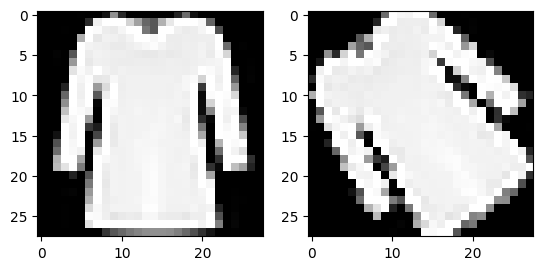

##########@@>
label
0    1464
5      21
9      20
7      19
3      18
8      18
6      16
1      14
4      12
2      11
Name: count, dtype: int64
label
0    484
2     10
4     10
9      9
3      6
8      5
1      5
5      4
6      3
7      2
Name: count, dtype: int64
-------------------
k: 2 -> i: 2 -> phi: 0.9 -> per: 0.011111111111111108
label
1    6300
0      78
4      78
3      78
9      78
5      78
6      78
2      78
8      78
7      78
Name: count, dtype: int64
Prob: 0.8349390941800859
>>>>>>>
label
1    5251
3      70
2      68
7      68
5      67
0      67
9      65
8      65
4      64
6      61
Name: count, dtype: int64
<<<<<<<
1
n_rand: -16


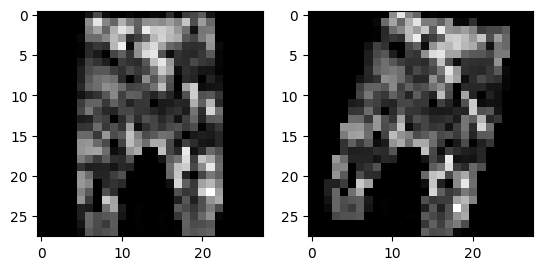

##########@@>
label
1    3935
7      54
2      53
3      52
4      49
5      49
8      49
0      48
9      48
6      47
Name: count, dtype: int64
label
1    1316
0      19
3      18
5      18
9      17
8      16
4      15
2      15
7      14
6      14
Name: count, dtype: int64
-------------------
k: 3 -> i: 3 -> phi: 0.9 -> per: 0.011111111111111108
label
2    6300
4      78
3      78
8      78
7      78
0      78
6      78
1      78
9      78
5      78
Name: count, dtype: int64
Prob: 0.5788069235806701
>>>>>>>
label
2    3673
0      49
1      45
4      44
9      43
3      41
6      40
7      40
8      39
5      39
Name: count, dtype: int64
<<<<<<<
1
n_rand: 33


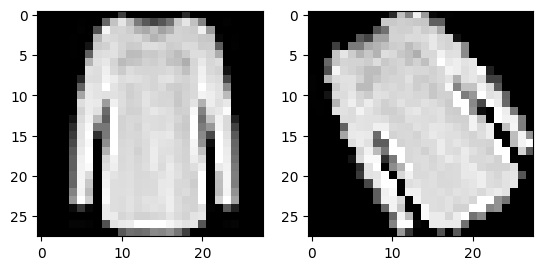

##########@@>
label
2    2746
0      36
7      35
3      34
8      34
9      32
1      32
5      32
6      31
4      27
Name: count, dtype: int64
label
2    927
4     17
1     13
0     13
9     11
6      9
5      7
3      7
8      5
7      5
Name: count, dtype: int64
-------------------
k: 4 -> i: 4 -> phi: 0.9 -> per: 0.011111111111111108
label
3    6300
2      78
5      78
1      78
0      78
9      78
8      78
6      78
4      78
7      78
Name: count, dtype: int64
Prob: 0.7925988833732059
>>>>>>>
label
3    5001
0      65
8      63
2      62
1      62
7      61
9      61
5      61
6      60
4      54
Name: count, dtype: int64
<<<<<<<
1
n_rand: -8


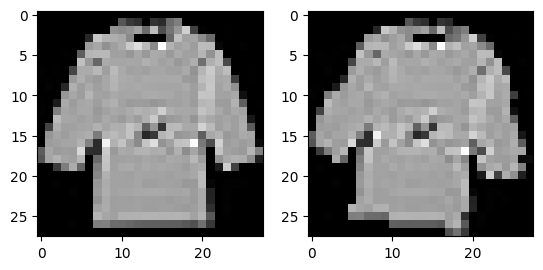

##########@@>
label
3    3752
0      51
6      47
7      47
1      46
2      46
5      45
8      44
9      44
4      40
Name: count, dtype: int64
label
3    1249
8      19
9      17
1      16
2      16
5      16
4      14
7      14
0      14
6      13
Name: count, dtype: int64
-------------------
k: 5 -> i: 5 -> phi: 0.9 -> per: 0.011111111111111108
label
4    6300
2      78
0      78
5      78
9      78
7      78
6      78
3      78
1      78
8      78
Name: count, dtype: int64
Prob: 0.9834921339974521
>>>>>>>
label
4    6190
1      78
8      78
0      78
9      78
5      78
6      77
2      77
7      76
3      76
Name: count, dtype: int64
<<<<<<<
1
n_rand: 38


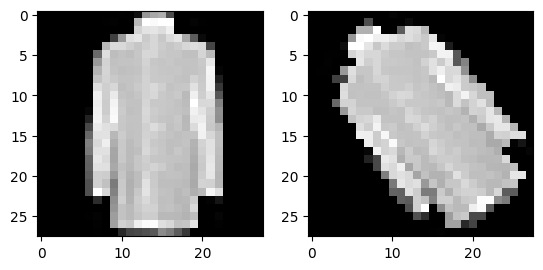

##########@@>
label
4    4647
8      64
1      61
7      59
2      58
3      57
9      56
0      55
5      55
6      52
Name: count, dtype: int64
label
4    1543
6      25
0      23
5      23
9      22
3      19
2      19
7      17
1      17
8      14
Name: count, dtype: int64
-------------------


In [22]:
# Generate dataset
qtde = 5

np.random.seed(1)
X_train, X_test, y_train, y_test = 0, 0, 0, 0
##
phi = 0.9
per = (1-phi) / 9 

for k in range(0, qtde):
    
    i = (k % 10) + 1

    print(f"k: {k+1} -> i: {i} -> phi: {phi} -> per: {per}")
    
    df_base = pd.DataFrame([])    
    for j in range(1,11): 
        df_train = pd.read_pickle(f"/home/renan/Documentos/tmp/Datasets/fmnist/non-iid/{j}_train.pickle")
        df_test = pd.read_pickle(f"/home/renan/Documentos/tmp/Datasets/fmnist/non-iid/{j}_test.pickle")
        df = pd.concat([df_train, df_test]).sample(frac=1, random_state=1)
        
        if i==j:
            df_aux = df.sample(frac=phi)           
        else:
            df_aux = df.sample(frac=per)        
               
        df_base = pd.concat([df_base, df_aux]).sample(frac=1)
    
    print(df_base["label"].value_counts())    
    prob = valores_distribuicao[k]
    print(f"Prob: {prob}")
    print(">>>>>>>")
    
    df_final = df_base.sample(frac=prob, random_state=1)
    print(df_final["label"].value_counts())
    
    print("<<<<<<<")
    
    array_final = df_final.drop(columns=["label"]).to_numpy()
    
    aux_teste = array_final[3].reshape(28,28).copy() # imprime logo abaixo
    for ii, item in enumerate(array_final):
        n_rand = random.randint(-45, 45) 
        
        imagem_original = array_final[ii].reshape(28,28).copy()
        imagem_pil = Image.fromarray(imagem_original)
        imagem_rotacionada = np.array(imagem_pil.rotate(n_rand))
        array_final[ii] = imagem_rotacionada.flatten()
        
        if ii == 1:
            print(f"{ii}")
            print(f"n_rand: {n_rand}")
            
            
            plt.clf()
            plt.subplot(1, 2, 1)
            plt.imshow(imagem_original, cmap='gray')            
           
            plt.subplot(1, 2, 2)
            plt.imshow(imagem_rotacionada, cmap='gray')
            plt.show()
            
         
    print(f"##########@@>")
    df_rotation_final = pd.DataFrame(array_final)
    df_rotation_final.reset_index(drop=True, inplace=True)
    df_rotation_final["label"] = df_final["label"].values      
    
    X_train, X_test, y_train, y_test = train_test_split(df_rotation_final, df_rotation_final['label'], test_size=0.25, shuffle=True)
    
    X_train.reset_index(drop=True, inplace=True)
    X_test.reset_index(drop=True, inplace=True)
    
    X_train.to_pickle(f"/home/renan/Documentos/tmp/Datasets/fmnist/non-iid-0.9-100-rotation-45/{k+1}_train.pickle")
    X_test.to_pickle(f"/home/renan/Documentos/tmp/Datasets/fmnist/non-iid-0.9-100-rotation-45/{k+1}_test.pickle")
    
    print(X_train["label"].value_counts())
    print(X_test["label"].value_counts())          
    print("-------------------")